In [1]:
import pandas as pd
import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [2]:
train = pd.read_csv("house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("house-prices-advanced-regression-techniques/test.csv")

In [3]:
train.isnull().sum()[train.isnull().sum() > 0]

train = train.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1)
test = test.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1)

In [4]:
corr = train.corr()

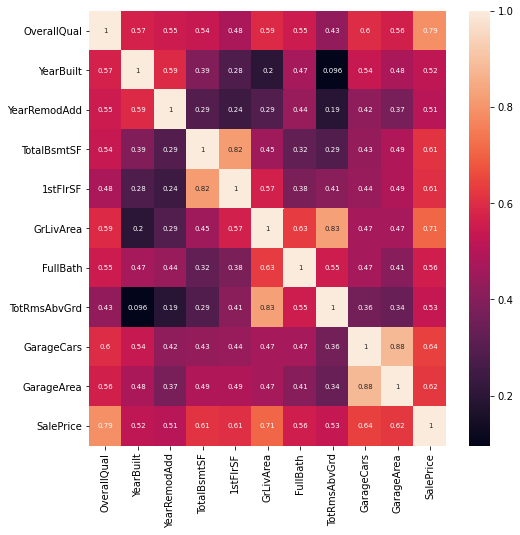

In [5]:
rev = corr.SalePrice[corr.SalePrice > 0.5]
rev
rev_cols = list(rev.index.values)
rev_cols

corr2 = train[rev_cols].corr()

plt.figure(figsize = (8, 8))

sns.heatmap(corr2, annot = True, annot_kws = {'size' : 7})

In [21]:
rev2 = corr.SalePrice[corr.SalePrice > 0.3]
rev2_cols = list(rev2.index.values)

In [13]:
def rmsle(pv, av) : # 예측값, 실제값
    # 넘파이 배열로 변환
    pv = np.array(pv)
    av = np.array(av)
    
    # 예측값과 실제값에 1을 더하고 로그를 씌운다
    log_predict = np.log(pv + 1)
    log_actual = np.log(av + 1)
    
    res = log_predict - log_actual
    res = np.square(res)
    
    mean_res = res.mean()
    score = np.sqrt(mean_res)
    return score

In [14]:
rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

In [15]:
kfold = KFold(n_splits = 10, shuffle = True, random_state = 42)

In [30]:
xTrain = train[rev2_cols[:-1]]
yTrain = train['SalePrice']
xTest = test[rev2_cols[:-1]]

In [31]:
xTest.isnull().sum()

LotFrontage     227
OverallQual       0
YearBuilt         0
YearRemodAdd      0
MasVnrArea       15
BsmtFinSF1        1
TotalBsmtSF       1
1stFlrSF          0
2ndFlrSF          0
GrLivArea         0
FullBath          0
TotRmsAbvGrd      0
Fireplaces        0
GarageYrBlt      78
GarageCars        1
GarageArea        1
WoodDeckSF        0
OpenPorchSF       0
dtype: int64

In [32]:
# rev_col
xTest.loc[xTest.TotalBsmtSF.isnull(), 'TotalBsmtSF'] = xTest.TotalBsmtSF.mean()
xTest.loc[xTest.GarageCars.isnull(), 'GarageCars'] = xTest.GarageCars.mean()
xTest.loc[xTest.GarageArea.isnull(), 'GarageArea'] = xTest.GarageArea.mean()

# rev2_col
xTrain.loc[xTrain.LotFrontage.isnull(), 'LotFrontage'] = xTrain.LotFrontage.mean()
xTrain.loc[xTrain.MasVnrArea.isnull(), 'MasVnrArea'] = xTrain.MasVnrArea.mean()
xTrain.loc[xTrain.GarageYrBlt.isnull(), 'GarageYrBlt'] = xTrain.GarageYrBlt.mean()

xTest.loc[xTest.LotFrontage.isnull(), 'LotFrontage'] = xTest.LotFrontage.mean()
xTest.loc[xTest.MasVnrArea.isnull(), 'MasVnrArea'] = xTest.MasVnrArea.mean()
xTest.loc[xTest.BsmtFinSF1.isnull(), 'BsmtFinSF1'] = xTest.BsmtFinSF1.mean()
xTest.loc[xTest.GarageYrBlt.isnull(), 'GarageYrBlt'] = xTest.GarageYrBlt.mean()

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [33]:
xTrain.isnull().sum()

LotFrontage     0
OverallQual     0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      0
BsmtFinSF1      0
TotalBsmtSF     0
1stFlrSF        0
2ndFlrSF        0
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
Fireplaces      0
GarageYrBlt     0
GarageCars      0
GarageArea      0
WoodDeckSF      0
OpenPorchSF     0
dtype: int64

In [34]:
model = RandomForestRegressor(n_estimators = 100,
                              n_jobs = -1,
                              random_state = 42)

In [35]:
model.fit(xTrain, yTrain)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [36]:
pred= model.predict(xTest)
pred

array([122511.07, 152211.4 , 173860.74, ..., 157123.25, 110774.  ,
       233033.41])

In [37]:
round(model.score(xTrain, yTrain)*100, 2)

97.89

In [38]:
score = cross_val_score(model, xTrain, yTrain, cv = kfold, scoring = rmsle_scorer)
score.mean()

0.15165878358859997

In [ ]:
housepricesubmit = pd.read_csv("house-prices-advanced-regression-techniques/sample_submission.csv")
housepricesubmit
housepricesubmit['SalePrice'] = pred
housepricesubmit

In [ ]:
housepricesubmit.to_csv("housepricesubmit.csv", index = False)